<a href="https://colab.research.google.com/github/hanbiphyun/ESSA_YB/blob/main/ESAA_YB_week2_%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#데이터 핸들링- 판다스
>2차원 데이터를 효율적으로 가공/처리할 수 있는 기능 제공 패키지
- 고수준 API 제공
- 파이썬의 리스트, 컬렉션, 넘파이 등의 내부 데이터 + CSV 등의 파일을 Dataframe으로 변경하여 수행 가능하게 함

**핵심 객체** : Dataframe

- 여러 개의 행과 열로 이뤄진 2차원 데이터를 담는 데이터 구조체
- 다른 중요 객체
1. Index : 개별 데이터를 고유하게 식별하는 key
2. Series : 하나의 column 가진 데이터 구조체

 +모든 dateframe, series는 Index 가짐


In [9]:
import pandas as pd

titanic_df= pd.read_csv(r'/content/train.csv')
titanic_df.head(3)

titanic_df= pd.read_csv('train.csv')
print('titanic 변수 type:', type(titanic_df))
titanic_df

titanic 변수 type: <class 'pandas.core.frame.DataFrame'>


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
print('DataFrame 크기:', titanic_df.shape)
titanic_df.info()

DataFrame 크기: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- info() 메서드 : 총 데이터 건수, 타입, Null건수
- describe() 메서드 : n-percentile분포, 평균값, 최댓값, 최솟값 -> 오직 숫자형 칼럼의 분포도만 출력
-> count : Not Null인 건수, 카테고리 칼럼을 숫자형으로 표시

In [12]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
#[] 연산자 내부에 칼럼명 입력-> Series 형태로 반환
#value_counts() 메서드 호출 시 칼럼의 유형, 건수 확인- 큰 순서대로 (유용함)
value_counts = titanic_df['Pclass'].value_counts()
print(value_counts)

titanic_pclass = titanic_df['Pclass']
print(type(titanic_pclass))

titanic_pclass.head()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64
<class 'pandas.core.series.Series'>


,Pclass
0,3
1,1
2,3
3,1
4,3


In [17]:
value_counts= titanic_df['Pclass'].value_counts()
print(type(value_counts))
print(value_counts)

<class 'pandas.core.series.Series'>
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [19]:
print('titanic_df 데이터 건수:', titanic_df.shape[0])
print('기본 설정인 dropna=True로 value_counts()')
#value_counts()는 디폴트로 dropna=True이므로 value_counts(dropna=True와 동일.
print(titanic_df['Embarked'].value_counts())
print(titanic_df['Embarked'].value_counts(dropna=False))

titanic_df 데이터 건수: 891
기본 설정인 dropna=True로 value_counts()
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64


###넘파이 ndarray, 파이썬 리스트, 딕셔너리로부터 DataFrame 생성
- 판다스 dataframe 객체

생성인자 data <- 리스트, 딕셔너리, 넘파이 ndarray 입력

생성인자 columns <- 칼럼명 리스트 입력

-> DataFrame 생성 (2차원 이하 데이터들만 가능)


In [20]:
import numpy as np

col_name1=['col1']
list1=[1,2,3]
array1= np.array(list1)
print('array1 shape:', array1.shape)
#리스트를 이용해 DataFrame 생성
df_array1= pd.DataFrame(array1, columns=col_name1)
print('1차원 ndarray로 만든 DataFrame:\n', df_array1)

array1 shape: (3,)
1차원 ndarray로 만든 DataFrame:
    col1
0     1
1     2
2     3


In [21]:
#3개의 칼럼명이 필요함.
col_name2=['col1','col2','col3']

#2행x3열 형태의 리스트와 ndarray 생성한 뒤 이를 DataFrame으로 변환.
list2=[[1,2,3],
       [11,12,13]]
array2=np.array(list2)
print('array2 shape:', array2.shape)
df_list2= pd.DataFrame(list2, columns=col_name2)
print('2차원 리스트로 만든 DataFrame:\n', df_list2)
df_array2= pd.DataFrame(array2, columns=col_name2)
print('2차원 ndarray로 만든 DataFrame:\n', df_array2)

array2 shape: (2, 3)
2차원 리스트로 만든 DataFrame:
    col1  col2  col3
0     1     2     3
1    11    12    13
2차원 ndarray로 만든 DataFrame:
    col1  col2  col3
0     1     2     3
1    11    12    13


In [22]:
#딕셔너리를 DataFrame으로 변환
#key는 문자열 칼럼명으로 매핑, Value는 리스트 형(또는 ndarray) 칼럼 데이터로 매핑
dict={'col1':[1,11],'col2':[2,22],'col3':[3,33]}
df_dict= pd.DataFrame(dict)
print('딕셔너리로 만든 DataFrame:\n', df_dict)

딕셔너리로 만든 DataFrame:
    col1  col2  col3
0     1     2     3
1    11    22    33


In [24]:
#DataFrame 객체의 values를 이용한 ndarray로의 변환 많이 사용함!

#DataFrame을 ndarray로 변환
array3=df_dict.values
print('df_dict.values 타입:', type(array3),'df_dict.values shape:', array3.shape)
print(array3)

#DataFrame을 리스트로 변환
list3= df_dict.values.tolist()
print('df_dict.values.tolist() 타입:', type(list3))
print(list3)

#DataFrame을 딕셔너리로 변환
dict3=df_dict.to_dict('list')
print('\n df_dict.to_dict() 타입:', type(dict3))
print(dict3)

df_dict.values 타입: <class 'numpy.ndarray'> df_dict.values shape: (2, 3)
[[ 1  2  3]
 [11 22 33]]
df_dict.values.tolist() 타입: <class 'list'>
[[1, 2, 3], [11, 22, 33]]

 df_dict.to_dict() 타입: <class 'dict'>
{'col1': [1, 11], 'col2': [2, 22], 'col3': [3, 33]}


In [26]:
#DataFrame의 칼럼 데이터 세트 생성과 수정

titanic_df['Age_0']=0 #데이터 값이 0으로 할당된 Series가 기존 DataFrame에 추가됨
titanic_df.head(3)

titanic_df['Age_by_10']=titanic_df['Age']*10
titanic_df['Family_No']=titanic_df['SibSp']+titanic_df['Parch']+1
titanic_df.head(3)

titanic_df['Age_by_10']=titanic_df['Age_by_10']+100
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0,Age_by_10,Family_No
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,220.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,380.0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,260.0,1


###DataFrame 데이터 삭제
- drop() 메서드 이용
>원형 : DataFrame.drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')

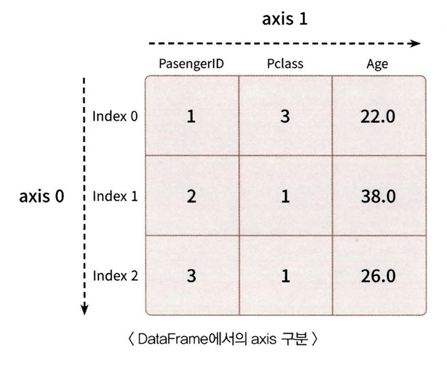

- labels에 원하는 칼럼명 입력 후 axis=1 입력 시 지정된 칼럼을 드롭함 -> 대부분의 경우

In [27]:
titanic_drop_df=titanic_df.drop('Age_0', axis=1)
titanic_drop_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_by_10,Family_No
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,220.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,380.0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,260.0,1


In [29]:
titanic_df.head(3) #Age_0 칼럼 존재
#inplace=False 디폴트-> 자기 자신의 DataFrame의 데이터 삭제하지 않음

drop_result=titanic_df.drop(['Age_0', 'Age_by_10', 'Fare'], axis=1, inplace=True)
print('inplace=True로 drop 후 반환된 값:', drop_result)
titanic_df.head(3)
#유의할 점 : inplace=True로 설정 후 반환값을 다시 자신의 DataFrame 객체로 할당하면 안됨

inplace=True로 drop 후 반환된 값: None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,Family_No
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,NaN,S,1


In [30]:
import pandas as pd

pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 15)
print('#### before axis 0 drop ####')
print(titanic_df.head(3))

titanic_df.drop([0,1,2], axis=0, inplace=True)

print('#### after axis 0 drop ####')
print(titanic_df.head(3))

#### before axis 0 drop ####
   PassengerId  Survived  Pclass            Name     Sex   Age  SibSp  Parch          Ticket Cabin Embarked  Family_No
0            1         0       3  Braund, Mr....    male  22.0      1      0       A/5 21171   NaN        S          2
1            2         1       1  Cumings, Mr...  female  38.0      1      0        PC 17599   C85        C          2
2            3         1       3  Heikkinen, ...  female  26.0      0      0  STON/O2. 31...   NaN        S          1
#### after axis 0 drop ####
   PassengerId  Survived  Pclass            Name     Sex   Age  SibSp  Parch  Ticket Cabin Embarked  Family_No
3            4         1       1  Futrelle, M...  female  35.0      1      0  113803  C123        S          2
4            5         0       3  Allen, Mr. ...    male  35.0      0      0  373450   NaN        S          1
5            6         0       3  Moran, Mr. ...    male   NaN      0      0  330877   NaN        Q          1


■ axis： DataFrame의 로우를 삭제할 때는 axis=0, 칼럼을 삭제할 때는 axis=1으로 설정.

■ 원본 DataFrame은 유지하고 드롭된 DataFrame을 새롭게 객체 변수로 받고 싶다면 inplace三False로 설정(디폴트 값이
False 임).

예: titanic_drop_df = titanic_df.drop(' Age_0', axis=1, inplace=False)

■ 원본 DataFrame에 드롭된 결과를 적용할 경우에는 inplace=True를 적용.

예: titanic_df.drop('Age_0', axis=l, inplace=True)

■ 원본 DataFrame에서 드롭된 DataFrame을 다시 원본 DataFrame 객체 변수로 할당하면 원본 DataFrame에서 드롭된 결과를 적용할 경우와 같음(단, 기존 원본 DataFrame 객체 변수는 메모리에서 추후 제거됨).

예: titanic_df = titanic_df.drop(' Age_0', axis=1, inplace=False )

###Index 객체
: DataFrame, Series의 레코드를 고유하게 식별하는 객체
- DataFrame.index, Series.index로 Index 객체 추출 가능
- Index 객체의 실제 값은 넘파이 1차원 ndarray로 볼 수 있음

In [5]:
import pandas as pd

#원본 파일 다시 로딩
titanic_df=pd.read_csv(r'/train.csv')
#Index 객체 추출
indexes=titanic_df.index
print(indexes)
#Index 객체를 실제 값 array로 변환
print('Index 객체 array 값:\n', indexes.values)

RangeIndex(start=0, stop=891, step=1)
Index 객체 array 값:
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 23

In [7]:
print(type(indexes.values))
print(indexes.values.shape)
print(indexes[:5].values)
print(indexes.values[:5])
print(indexes[6])

indexes[0]=5 #Index 객체는 변경 불가

<class 'numpy.ndarray'>
(891,)
[0 1 2 3 4]
[0 1 2 3 4]
6


TypeError: Index does not support mutable operations

In [9]:
series_fair=titanic_df['Fare']
print('Fair Series max 값:', series_fair.max())
print('Fair Series sum 값:', series_fair.sum())
print('sum() Fair Series:', sum(series_fair))
print('Fair Series + 3:\n', (series_fair+3).head(3))

#reset_index() 메서드 수행 시 새롭게 인덱스 할당
titanic_reset_df= titanic_df.reset_index(inplace=False)
titanic_reset_df.head(3)

Fair Series max 값: 512.3292
Fair Series sum 값: 28693.9493
sum() Fair Series: 28693.9493
Fair Series + 3:
 0    10.2500
1    74.2833
2    10.9250
Name: Fare, dtype: float64


,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [11]:
print('### before reset_index ###')
value_counts=titanic_df['Pclass'].value_counts()
print(value_counts)
print('value_counts 객체 변수 타입:', type(value_counts))
new_value_counts=value_counts.reset_index(inplace=False)
print('### After reset_index ###')
print(new_value_counts)
print('new_value_counts 객체 변수 타입:', type(new_value_counts))

### before reset_index ###
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
value_counts 객체 변수 타입: <class 'pandas.core.series.Series'>
### After reset_index ###
   Pclass  count
0       3    491
1       1    216
2       2    184
new_value_counts 객체 변수 타입: <class 'pandas.core.frame.DataFrame'>


###데이터 셀렉션 및 필터링
- 넘파이) [ ] 연산자 내 단일 값 추출, 슬라이싱, 팬시 인덱싱, 불린 인덱싱으로 데이터 추출
- 판다스) iloc[ ], loc[ ] 연산자 사용
> DataFrame의 [ ] 연산자 :
[칼럼명 문자/ 칼럼명의 리스트 객체/ 인덱스로 변환가능한 표현식] -> 넘파이와의 차이

■ DataFrame 바로 뒤의 [ ] 연산자는 넘파이의 [ ]나 Series의 [ ]와 다릅니다.

■ DataFrame 바로 뒤의 [ ] 내 입력값은 칼럼명(또는 칼럼의 리스트)을 지정해 칼럼 지정 연산에 사용하거나 불린 인덱스 용도로만 사용해야 합니다.

■ DataFrame[ 0:2 ]와 같은 슬라이싱 연산으로 데이터를 추출하는 방법은 사용하지 않는 게 좋습니다



In [14]:
print('단일 칼럼 데이터 추출:\n', titanic_df['Pclass'].head(3))
print('\n여러 칼럼의 데이터 추출:\n', titanic_df[['Survived', 'Pclass']].head(3))
print('[ ]안에 숫자 index는 KeyError 오류 발생:\n', titanic_df[0])

단일 칼럼 데이터 추출:
 0    3
1    1
2    3
Name: Pclass, dtype: int64

여러 칼럼의 데이터 추출:
    Survived  Pclass
0         0       3
1         1       1
2         1       3


KeyError: 0

In [15]:
titanic_df[0:2] #슬라이싱은 가능

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [16]:
titanic_df[titanic_df['Pclass']==3].head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S


###DataFrame
- iloc[ ] 연산자는 위치 기반 인덱싱 방식으로 동작 -> 행과 열의 좌표 위치 값
- loc[ ]은 명칭(label)기반 인덱싱 방식으로 동작 -> 행 위치에는 DataFrame 인덱스 값, 열 위치에는 칼럼명을 입력해서 loc[인덱스값, 칼럼명] 형태로 데이터 추출

1. 개별 또는 여러 칼럼 값 전체를 추출하고자 한다면 iloc[ ]나 loc[ ]를 사용하지 않고 data_df[‘Name’]과 같이
DataFramef칼럼명’]만으로 충분합니다. 하지만 행과 열을 함께 사용하여 데이터를 추출해야 한다면 iloc[ ]나
loc[｝를 사용해야 합니다.

2. iloc[ ]와 loc[ ｝를 이해하기 위해서는 명칭 기반 인덱싱과 위치 기반 인덱싱의 차이를 먼저 이해해야 합니다.
DataFrame의 인덱스나 칼럼명으로 데이터에 접근하는 것은 명칭 기반 인덱싱입니다. 0부터 시작하는 행, 열의 위
치 좌표에만 의존하는 것이 위치 기반 인덱싱입니다.

3. iloc[｝는 위치 기반 인덱싱만 가능합니다. 따라서 행과 열 위치 값으로 정수형 값을 지정해 원하는 데이터를 반환합
니다.

4. Ioc[ ]는 명칭 기반 인덱싱만 가능합니다. 따라서 행 위치에 DataFrame 인덱스가 오며, 열 위치에는 칼럼명을 지정
해 원하는 데이터를 반환합니다.

5. 명칭 기반 인덱싱에서 슬라이싱을 ‘시작점:종료점’으로 지정할 때 시작점에서 종료점을 포함한 위치에 있는 데이터
를 반환합니다.


In [19]:
data={'Name':['Chulmin','Eunkyung','Jinwoong','Soobeom'],
      'Year':[2011,2016,2015,2015],
      'Gender':['Male','Female','Male','Male']}
data_df=pd.DataFrame(data, index=['one','two','three','four'])
data_df


,Name,Year,Gender
one,Chulmin,2011,Male
two,Eunkyung,2016,Female
three,Jinwoong,2015,Male
four,Soobeom,2015,Male


In [20]:
data_df.iloc[0,0]

'Chulmin'

In [21]:
#아래 코드는 오류를 발생시킵니다.
data_df.iloc[0,'Name']

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

In [22]:
#아래 코드는 오류를 발생시킵니다.
data_df.iloc['one',0]

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

In [23]:
print('\n 맨 마지막 칼럼 데이터 [:,-1]\n', data_df.iloc[:,-1])
print('\n 맨 마지막 칼럼을 제외한 모든 데이터 [:,:-1]\n', data_df.iloc[:,:-1])


 맨 마지막 칼럼 데이터 [:,-1]
 one        Male
two      Female
three      Male
four       Male
Name: Gender, dtype: object

 맨 마지막 칼럼을 제외한 모든 데이터 [:,:-1]
            Name  Year
one     Chulmin  2011
two    Eunkyung  2016
three  Jinwoong  2015
four    Soobeom  2015


In [25]:
#DataFrame loc[ ]연산자
data_df.loc['one','Name']

'Chulmin'

In [26]:
#다음 코드는 오류를 발생시킵니다.
data_df.loc[0,'Name'] #loc 에서는 시작값 ~ 종료값 까지 포함

KeyError: 0

In [27]:
print('위치 기반 iloc slicing\n', data_df.iloc[0:1,0],'\n')
print('명칭 기반 loc slicing\n', data_df.loc['one':'two','Name'])

위치 기반 iloc slicing
 one    Chulmin
Name: Name, dtype: object 

명칭 기반 loc slicing
 one     Chulmin
two    Eunkyung
Name: Name, dtype: object


In [28]:
#불린 인덱싱
titanic_df=pd.read_csv('/train.csv')
titanic_boolean = titanic_df[titanic_df['Age']>60]
print(type(titanic_boolean))
titanic_boolean

<class 'pandas.core.frame.DataFrame'>


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


In [29]:
titanic_df[titanic_df['Age']>60][['Name','Age']].head(3)

,Name,Age
33,"Wheadon, Mr. Edward H",66.0
54,"Ostby, Mr. Engelhart Cornelius",65.0
96,"Goldschmidt, Mr. George B",71.0


In [30]:
titanic_df.loc[titanic_df['Age']>60, ['Name','Age']].head(3)

,Name,Age
33,"Wheadon, Mr. Edward H",66.0
54,"Ostby, Mr. Engelhart Cornelius",65.0
96,"Goldschmidt, Mr. George B",71.0


In [31]:
titanic_df[(titanic_df['Age']>60)&(titanic_df['Pclass']==1)&(titanic_df['Sex']=='female')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN


In [32]:
cond1= titanic_df['Age']>60
cond2= titanic_df['Pclass']==1
cond3= titanic_df['Sex']=='female'
titanic_df[cond1&cond2&cond3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN


###정렬, Aggregation 함수, gGroupBy 적용
- DataFrame, Series의 정렬

-> sort_values()
: 주요 입력 파라미터는 by, ascending, inplace

(ascending=True 오름차순 정렬)

In [33]:
titanic_sorted=titanic_df.sort_values(by=['Name'])
titanic_sorted.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
845,846,0,3,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.55,NaN,S
746,747,0,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.25,NaN,S
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.25,NaN,S


In [34]:
titanic_sorted= titanic_df.sort_values(by=['Pclass','Name'], ascending=False)
titanic_sorted.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5,NaN,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5,NaN,S
282,283,0,3,"de Pelsmaeker, Mr. Alfons",male,16.0,0,0,345778,9.5,NaN,S


In [35]:
#Aggregation 함수 적용 - min(), max(), sum(), count() -> 모든 칼럼에 적용시킴
titanic_df.count()

,0
PassengerId,891
Survived,891
Pclass,891
Name,891
Sex,891
Age,714
SibSp,891
Parch,891
Ticket,891
Fare,891


In [36]:
titanic_df[['Age','Fare']].mean()

,0
Age,29.699118
Fare,32.204208


In [37]:
#group_by 적용
titanic_groupby= titanic_df.groupby(by='Pclass')
print(type(titanic_groupby))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [38]:
titanic_groupby = titanic_df.groupby('Pclass').count()
titanic_groupby

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214
2,184,184,184,184,173,184,184,184,184,16,184
3,491,491,491,491,355,491,491,491,491,12,491


In [39]:
titanic_groupby=titanic_df.groupby('Pclass')[['PassengerId','Survived']].count()
titanic_groupby

,PassengerId,Survived
Pclass,,
1,216,216
2,184,184
3,491,491


In [40]:
titanic_df.groupby('Pclass')['Age'].agg([max,min])

/tmp/ipython-input-414103430.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  titanic_df.groupby('Pclass')['Age'].agg([max,min])
/tmp/ipython-input-414103430.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  titanic_df.groupby('Pclass')['Age'].agg([max,min])


,max,min
Pclass,,
1,80.0,0.92
2,70.0,0.67
3,74.0,0.42


In [41]:
agg_format={'Age':'max','SibSp':'sum','Fare':'mean'}
titanic_df.groupby('Pclass').agg(agg_format)

,Age,SibSp,Fare
Pclass,,,
1,80.0,90,84.154687
2,70.0,74,20.662183
3,74.0,302,13.675550


###결손 데이터 처리하기
- NaN 여부 확인 API는 isna()
- NaN 값을 다른 값으로 대체하는 API는 fillna()


In [42]:
titanic_df.isna().head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False


In [43]:
titanic_df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [44]:
titanic_df['Cabin']=titanic_df['Cabin'].fillna('C000')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C000,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C000,S


In [45]:
titanic_df['Age']=titanic_df['Age'].fillna(titanic_df['Age'].mean())
titanic_df['Embarked']= titanic_df['Embarked'].fillna('S')
titanic_df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


###apply lambda 식으로 데이터 가공
-- lambda식은 파이썬에서 함수형 프로그래밍을 지원하기 위해 만듬

In [46]:
def get_square(a):
    return a**2

print('3의 제곱은:', get_square(3))

3의 제곱은: 9


In [47]:
lambda_square= lambda x : x**2
print('3의 제곱은:', lambda_square(3))

3의 제곱은: 9


In [48]:
a=[1,2,3]
squares= map(lambda x : x**2, a)
list(squares)

[1, 4, 9]

In [49]:
titanic_df['Name_len']= titanic_df['Name'].apply(lambda x : len(x))
titanic_df[['Name','Name_len']].head(3)

,Name,Name_len
0,"Braund, Mr. Owen Harris",23
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",51
2,"Heikkinen, Miss. Laina",22


In [50]:
titanic_df['Child_Adult']=titanic_df['Age'].apply(lambda x : 'Child' if x<=15 else 'Adult')
titanic_df[['Age','Child_Adult']].head(8)
#

,Age,Child_Adult
0,22.000000,Adult
1,38.000000,Adult
2,26.000000,Adult
3,35.000000,Adult
4,35.000000,Adult
5,29.699118,Adult
6,54.000000,Adult
7,2.000000,Child


In [51]:
titanic_df['Age_cat']=titanic_df['Age'].apply(lambda x : 'Child' if x<=15 else ('Adult' if x<=60 else 'Elderly'))
titanic_df['Age_cat'].value_counts()

,count
Age_cat,
Adult,786
Child,83
Elderly,22


In [52]:
#나이에 따라 세분화된 분류를 수행하는 함수 생성.
def get_category(age):
    cat=''
    if age<=5: cat= 'Baby'
    elif age<= 12: cat ='Child'
    elif age<=18: cat='Teenager'
    elif age<=25: cat='Student'
    elif age<=35: cat='Young Adult'
    elif age<=60: cat='Adult'
    else: cat='Elderly'

    return cat

#lambda 식에 위에서 생성한 get_category() 함수를 반환값으로 지정.
#get_category(x)는 입력값으로 'Age' 칼럼값을 받아서 해당하는 cat 반환
titanic_df['Age_cat']= titanic_df['Age'].apply(lambda x : get_category(x))
titanic_df[['Age','Age_cat']].head()

,Age,Age_cat
0,22.0,Student
1,38.0,Adult
2,26.0,Young Adult
3,35.0,Young Adult
4,35.0,Young Adult
